# Desafío Integrador: Modelo de Clasificación

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc,  recall_score, precision_score, f1_score
from sklearn import tree

## Preprocesamiento

In [2]:
import imblearn
print(imblearn.__version__)

0.7.0


In [3]:
df = pd.read_csv('../TP_Integrador/df_final.csv')

c:\Users\cmora\anaconda3\envs\dhdsblend2021\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(438928, 17)

In [5]:
df.head()

,crash_date,borough,zip code,latitude,longitude,location,collision_id,injured,deaths_number,vehicle,main_contributing_factor,road_type,crash_time,time_of_day,weekday,season,deaths
0,2021-12-14,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",4486519,0,0,Passenger vehicle,Passing Too Closely,avenue,14:58:00,day,Tuesday,Winter,0
1,2021-12-14,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",4487127,0,0,Passenger vehicle,Turning Improperly,boulevard,16:50:00,day,Tuesday,Winter,0
2,2021-12-14,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",4486635,4,0,Passenger vehicle,Other,avenue,23:10:00,night,Tuesday,Winter,0
3,2021-12-14,BROOKLYN,11211,40.710957,-73.951126,"(40.710957, -73.951126)",4486556,2,0,Bus,Passing or Lane Usage Improper,street,17:15:00,day,Tuesday,Winter,0
4,2022-04-24,BRONX,10466,40.894810,-73.861830,"(40.89481, -73.86183)",4521633,0,0,Passenger vehicle,Driver Inattention/Distraction,way,17:45:00,day,Sunday,Spring,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438928 entries, 0 to 438927
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   crash_date                438928 non-null  object 
 1   borough                   438928 non-null  object 
 2   zip code                  438928 non-null  object 
 3   latitude                  438928 non-null  float64
 4   longitude                 438928 non-null  float64
 5   location                  438928 non-null  object 
 6   collision_id              438928 non-null  int64  
 7   injured                   438928 non-null  int64  
 8   deaths_number             438928 non-null  int64  
 9   vehicle                   438928 non-null  object 
 10  main_contributing_factor  438928 non-null  object 
 11  road_type                 438928 non-null  object 
 12  crash_time                438928 non-null  object 
 13  time_of_day               438928 non-null  o

In [4]:
df['road_type'] = df['road_type'].str.title()
df['time_of_day'] = df['time_of_day'].str.title()

In [8]:
df.deaths.value_counts()  # Variable target muy desbalanceada

0    438294
1       634
Name: deaths, dtype: int64

In [9]:
df.columns

Index(['crash_date', 'borough', 'zip code', 'latitude', 'longitude',
       'location', 'collision_id', 'injured', 'deaths_number', 'vehicle',
       'main_contributing_factor', 'road_type', 'crash_time', 'time_of_day',
       'weekday', 'season', 'deaths'],
      dtype='object')

In [10]:
df.borough.unique()

array(['MANHATTAN', 'QUEENS', 'BROOKLYN', 'BRONX', 'STATEN ISLAND'],
      dtype=object)

In [5]:
col_categoricas = ['borough', 'vehicle', 'main_contributing_factor', 'road_type', 'time_of_day', 'weekday', 'season']

In [6]:
# Generamos las variables dummies para los datos categóricos.
df_dummy = pd.get_dummies(df[col_categoricas],drop_first=False, dtype=float)

In [51]:
df_dummy.head()

,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,vehicle_Bike,vehicle_Bus,vehicle_Large commercial vehicle,vehicle_Motorcycle,vehicle_Other,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_Fall,season_Spring,season_Summer,season_Winter
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
df_dummy.shape

(438928, 49)

In [7]:
X = pd.merge(df_dummy, df.injured, left_index=True, right_index=True, how='inner')
y = df.deaths

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [10]:
# chequeamos la presencia relativa de cada clase y el tamaño de los datasets
print('Entrenamiento:',X_train.shape)
print('Testeo:',X_test.shape)
print('\nClases train:')
print(y_train.value_counts(normalize=True))
print('\nClases test:')
print(y_test.value_counts(normalize=True))

Entrenamiento: (329196, 50)
Testeo: (109732, 50)

Clases train:
0    0.998554
1    0.001446
Name: deaths, dtype: float64

Clases test:
0    0.99856
1    0.00144
Name: deaths, dtype: float64


In [9]:
y_test.value_counts()

0    109574
1       158
Name: deaths, dtype: int64

## Modelo baseline: decision tree

In [12]:
# Definimos función para entrenar y evaluar performance de un modelo

def modelo_report(X_train,X_test,y_train,y_test):

    model = tree.DecisionTreeClassifier(random_state=40)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_proba=model.predict_proba(X_test)

    plot_confusion_matrix(model,X_test,y_test,cmap='Blues')

    print('Accuracy=', accuracy_score(y_test, y_pred))
    print('Recall=', recall_score(y_test, y_pred))
    print('Precision=', precision_score(y_test, y_pred))
    print('F-1 Score=', f1_score(y_test,y_pred))
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))

    return


Accuracy= 0.9980680202675609
Recall= 0.0379746835443038
Precision= 0.09090909090909091
F-1 Score= 0.05357142857142857
Area bajo la curva ROC: 0.5195


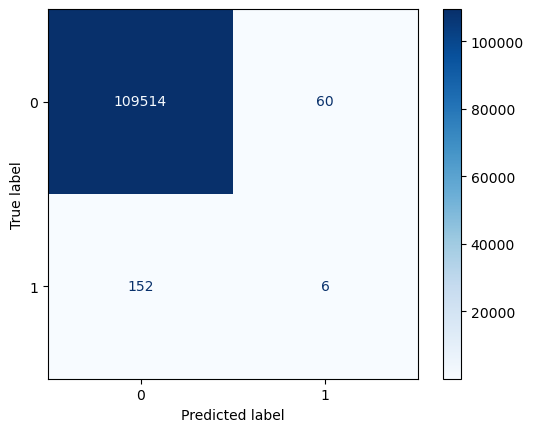

In [58]:
# Probamos modelo de Árbol de Decisión por default con datos originales

modelo_report(X_train, X_test, y_train, y_test)

## Resampling

### Undersampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(sampling_strategy=0.20)

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
0    2380
1     476
Name: deaths, dtype: int64

Composición del test set:
0    109574
1       158
Name: deaths, dtype: int64


Accuracy= 0.8630025881237925
Recall= 0.3670886075949367
Precision= 0.003868988059502368
F-1 Score= 0.007657271107003764
Area bajo la curva ROC: 0.6181


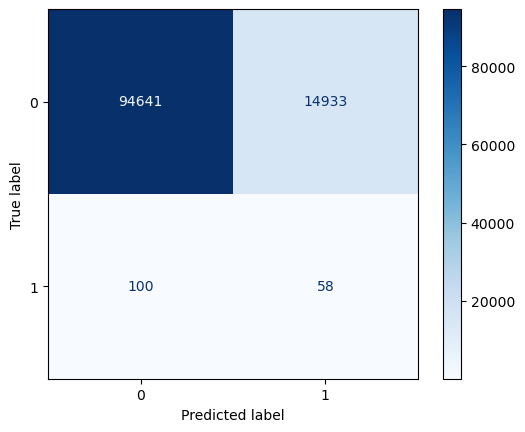

In [23]:
# Probamos modelo con nuevo dataset 'sampling_strategy=0.20'

modelo_report(X_train_us, X_test, y_train_us, y_test)

In [11]:
# Probamos con otra proporción de clases

undersampler_2=RandomUnderSampler(sampling_strategy='majority')

X_train_us_2,y_train_us_2=undersampler_2.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_us_2.value_counts())

print("\n")
modelo_report(X_train_us_2, X_test, y_train_us_2, y_test)

Composición del training set:
1    476
0    476
Name: deaths, dtype: int64




NameError: name 'modelo_report' is not defined

Composición del training set:
0    1190
1     476
Name: deaths, dtype: int64


Accuracy= 0.7948000583239164
Recall= 0.5316455696202531
Precision= 0.0037288587028898655
F-1 Score= 0.007405774741018293
Area bajo la curva ROC: 0.6677


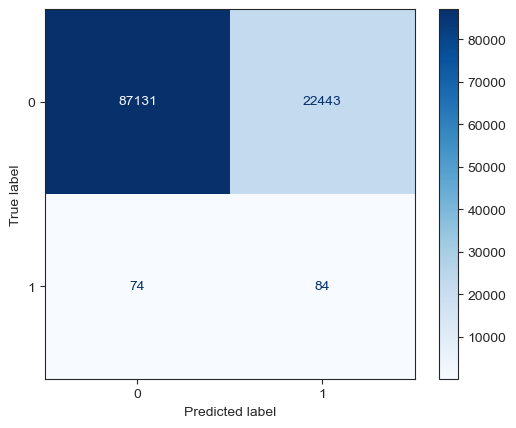

In [185]:
# Probamos con otra proporción de clases

undersampler_3=RandomUnderSampler(sampling_strategy=0.40)

X_train_us_3,y_train_us_3=undersampler_3.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_us_3.value_counts())

print("\n")
modelo_report(X_train_us_3, X_test, y_train_us_3, y_test)

### Oversampling

In [22]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts(normalize=True))

print('\nComposición del test set:')
print(y_test.value_counts())


Composición del training set:
1    0.5
0    0.5
Name: deaths, dtype: float64

Composición del test set:
0    109574
1       158
Name: deaths, dtype: int64


Accuracy= 0.9798782488244085
Recall= 0.0379746835443038
Precision= 0.002909796314258002
F-1 Score= 0.005405405405405406
Area bajo la curva ROC: 0.5099


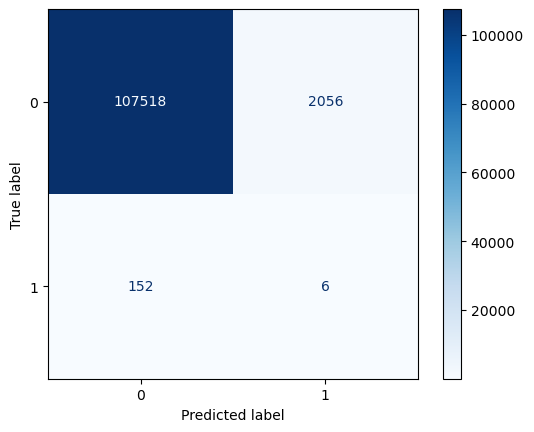

In [26]:
modelo_report(X_train_os, X_test, y_train_os, y_test)

Composición del training set:
0    0.869565
1    0.130435
Name: deaths, dtype: float64


Accuracy= 0.9821838661466118
Recall= 0.03164556962025317
Precision= 0.002767017155506364
F-1 Score= 0.0050890585241730275
Area bajo la curva ROC: 0.5066


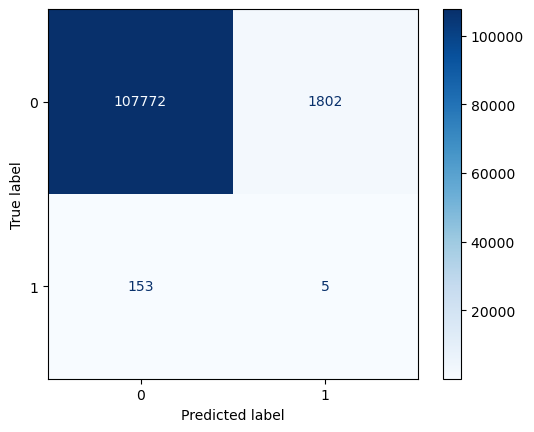

In [27]:
# Probamos con otra proporción

oversampler_2=RandomOverSampler(sampling_strategy=0.15);

X_train_os_2,y_train_os_2=oversampler_2.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os_2.value_counts(normalize=True))

print("\n")
modelo_report(X_train_os_2, X_test, y_train_os_2, y_test)

### Oversampling con SMOTENC

In [28]:
X_2 = pd.merge(df[col_categoricas], df.injured, left_index=True, right_index=True, how='inner')
X_2.columns

Index(['borough', 'vehicle', 'main_contributing_factor', 'road_type',
       'time_of_day', 'weekday', 'season', 'injured'],
      dtype='object')

In [29]:
# Volvemos a hacer el train test split (con la misma semilla que al principio) conservando las variables categóricas

X_train_cat, X_test_cat, y_train_2, y_test_2 = train_test_split(X_2, y, stratify = y, random_state=42)

In [30]:
from imblearn.over_sampling import SMOTENC

categorical_cols=(X_train_cat.dtypes=='object').values

sm=SMOTENC(categorical_features=categorical_cols,sampling_strategy=0.15, k_neighbors=5,random_state=0)
X_train_sm,y_train_sm=sm.fit_resample(X_train_cat,y_train_2)

In [31]:
print('Training set:')
print(y_train_sm.value_counts(normalize=True))

print('\nTest set:')
print(y_test_2.value_counts())

Training set:
0    0.869565
1    0.130435
Name: deaths, dtype: float64

Test set:
0    109574
1       158
Name: deaths, dtype: int64


In [32]:
train_dummies = pd.get_dummies(X_train_sm[col_categoricas],drop_first=True, dtype=float)

test_dummies = pd.get_dummies(X_test_cat[col_categoricas],drop_first=True, dtype=float)

X_train_final = pd.merge(train_dummies, X_train_sm.injured, left_index=True, right_index=True, how='inner')

X_test_final = pd.merge(test_dummies, df.injured, left_index=True, right_index=True, how='inner')

print(X_train_final.shape)
print(X_test_final.shape)

(378028, 43)
(109732, 43)


In [33]:
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_sm.shape)
print(y_test_2.shape)

(378028, 43)
(109732, 43)
(378028,)
(109732,)


Accuracy= 0.9753945977472387
Recall= 0.0759493670886076
Precision= 0.004676539360872954
F-1 Score= 0.00881057268722467
Area bajo la curva ROC: 0.5242


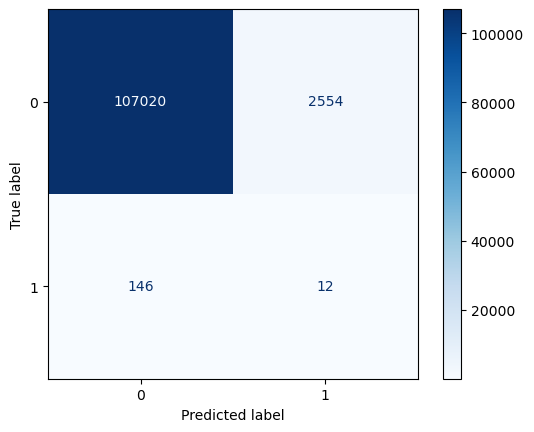

In [34]:
modelo_report(X_train_final, X_test_final, y_train_sm, y_test_2)

Training set:
0    328720
1    115051
Name: deaths, dtype: int64

Test set:
0    109574
1       158
Name: deaths, dtype: int64


Accuracy= 0.9639120766959501
Recall= 0.08227848101265822
Precision= 0.0033960292580982234
F-1 Score= 0.006522829904666331
Area bajo la curva ROC: 0.5304


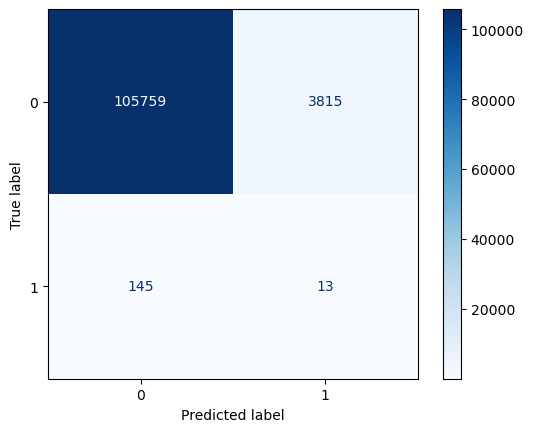

In [35]:
# Probamos con otra proporción

X_train_cat_2, X_test_cat_2, y_train_3, y_test_3 = train_test_split(X_2, y, stratify = y, random_state=42)

sm_2=SMOTENC(categorical_features=categorical_cols,sampling_strategy=0.35, k_neighbors=5,random_state=1)
X_train_sm_2,y_train_sm_2=sm_2.fit_resample(X_train_cat_2,y_train_3)

print('Training set:')
print(y_train_sm_2.value_counts())

print('\nTest set:')
print(y_test_3.value_counts())

train_dummies_2 = pd.get_dummies(X_train_sm_2[col_categoricas],drop_first=True, dtype=float)

test_dummies_2 = pd.get_dummies(X_test_cat_2[col_categoricas],drop_first=True, dtype=float)

X_train_final_2 = pd.merge(train_dummies_2, X_train_sm_2.injured, left_index=True, right_index=True, how='inner')

X_test_final_2 = pd.merge(test_dummies_2, X_test_cat_2.injured, left_index=True, right_index=True, how='inner')

print("\n")
modelo_report(X_train_final_2, X_test_final_2, y_train_sm_2, y_test_2)

### Resultados: 

A partir de los resultados obtenidos probando las distintas estrategias de resampling, optaremos por usar la estrategia de undersampling, ya que es la mejor logra clasificar los casos positivos, que son los casos que nos interesa clasificar con mayor precisión en nuestro problema

## Modelos de Ensamble con árboles de decisión

### Bagging

In [59]:
# Probaremos un modelo de Bagging usando un dataset resampleado con undersampling

from sklearn.ensemble import BaggingClassifier

clftree = tree.DecisionTreeClassifier()

bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [22]:
# Definimos una nueva función para evaluar modelos modificando la creada anteriormente

def modelo_report_2(X_train,X_test,y_train,y_test, model):

    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_proba=model.predict_proba(X_test)

    plot_confusion_matrix(model,X_test,y_test,cmap='Blues')

    print('Accuracy=', accuracy_score(y_test, y_pred))
    print('Recall=', recall_score(y_test, y_pred))
    print('Precision=', precision_score(y_test, y_pred))
    print('F-1 Score=', f1_score(y_test,y_pred))
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))

    return

Composición del training set:
0    1904
1     476
Name: deaths, dtype: int64


Accuracy= 0.9108190865016585
Recall= 0.4177215189873418
Precision= 0.006762295081967213
F-1 Score= 0.013309134906231094
Area bajo la curva ROC: 0.777


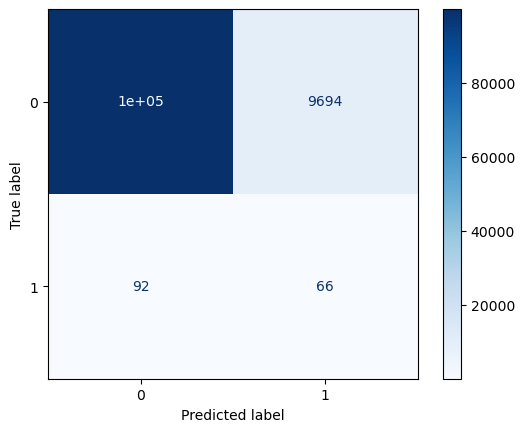

In [61]:
# 1 - Generamos dataset a utilizar con undersampling

undersampler_bg=RandomUnderSampler(sampling_strategy=0.25)

X_train_bg,y_train_bg=undersampler_bg.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_bg.value_counts())

# Probamos el modelo de bagging

print("\n")
modelo_report_2(X_train_bg, X_test, y_train_bg, y_test, bag_clf)

Composición del training set:
1    476
0    476
Name: deaths, dtype: int64


Accuracy= 0.702320198301316
Recall= 0.7088607594936709
Precision= 0.0034218325135192936
F-1 Score= 0.006810787801392563
Area bajo la curva ROC: 0.788


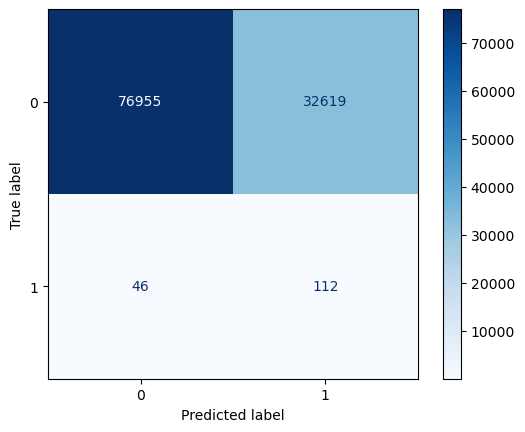

In [62]:
# 2 - Probamos con otra proporción de clases en el dataset

undersampler_bg=RandomUnderSampler(sampling_strategy='majority')

X_train_bg,y_train_bg=undersampler_bg.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_bg.value_counts())

# Probamos el modelo de bagging

print("\n")
modelo_report_2(X_train_bg, X_test, y_train_bg, y_test, bag_clf)

Composición del training set:
0    1190
1     476
Name: deaths, dtype: int64


Accuracy= 0.8595031531367331
Recall= 0.5
Precision= 0.005124213530518259
F-1 Score= 0.01014446227929374
Area bajo la curva ROC: 0.7799


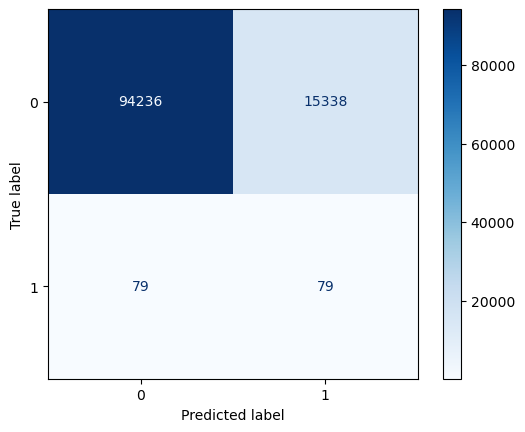

In [40]:
# 2 - Probamos con otra proporción de clases en el dataset

undersampler_bg=RandomUnderSampler(sampling_strategy=0.4)

X_train_bg,y_train_bg=undersampler_bg.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_bg.value_counts())

# Probamos el modelo de bagging

print("\n")
modelo_report_2(X_train_bg, X_test, y_train_bg, y_test, bag_clf)

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

Composición del training set:
0    1904
1     476
Name: deaths, dtype: int64


Accuracy= 0.9468887835818175
Recall= 0.3037974683544304
Precision= 0.008324661810613945
F-1 Score= 0.0162052667116813
Area bajo la curva ROC: 0.7741


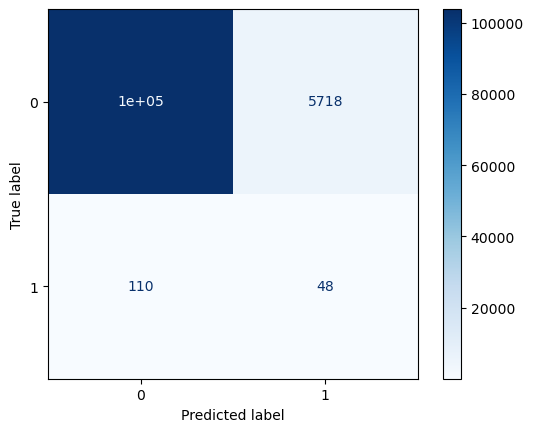

In [64]:
# 1 - Generamos dataset a utilizar con undersampling

undersampler_rf=RandomUnderSampler(sampling_strategy=0.25)

X_train_rf,y_train_rf=undersampler_rf.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_rf.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, rf_clf)

Composición del training set:
1    476
0    476
Name: deaths, dtype: int64


Accuracy= 0.6971348376043451
Recall= 0.7531645569620253
Precision= 0.003572071801644954
F-1 Score= 0.007110420650095602
Area bajo la curva ROC: 0.7906


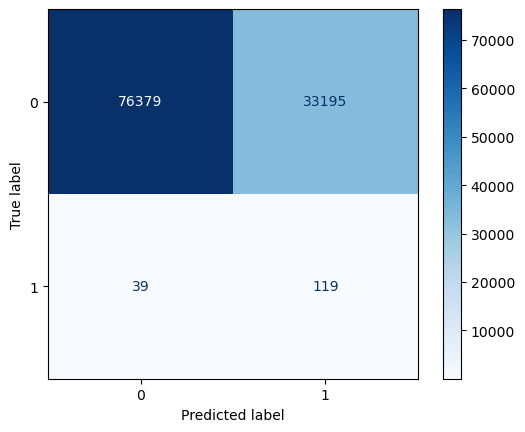

In [65]:
# 2 - Probamos con otra proporción de clases en el dataset

undersampler_rf=RandomUnderSampler(sampling_strategy='majority')

X_train_rf,y_train_rf=undersampler_rf.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_rf.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, rf_clf)

Composición del training set:
0    1190
1     476
Name: deaths, dtype: int64


Accuracy= 0.8975777348448948
Recall= 0.4620253164556962
Precision= 0.006502182239244678
F-1 Score= 0.012823891084760649
Area bajo la curva ROC: 0.7895


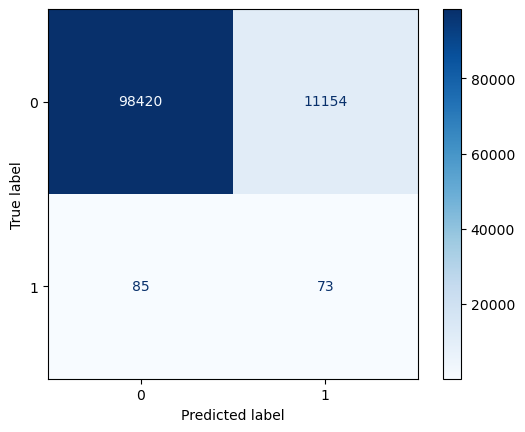

In [67]:
# 3 - Probamos con otra proporción de clases en el dataset

undersampler_rf=RandomUnderSampler(sampling_strategy=0.4)

X_train_rf,y_train_rf=undersampler_rf.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_rf.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, rf_clf)

## Balanced Random Forest

In [13]:
from imblearn.ensemble import BalancedRandomForestClassifier

bl_rf = BalancedRandomForestClassifier(n_estimators=1000, random_state=42)

Accuracy= 0.7194619618707396
Recall= 0.7531645569620253
Precision= 0.0038556246759979262
F-1 Score= 0.007671974727612661
Area bajo la curva ROC: 0.8103


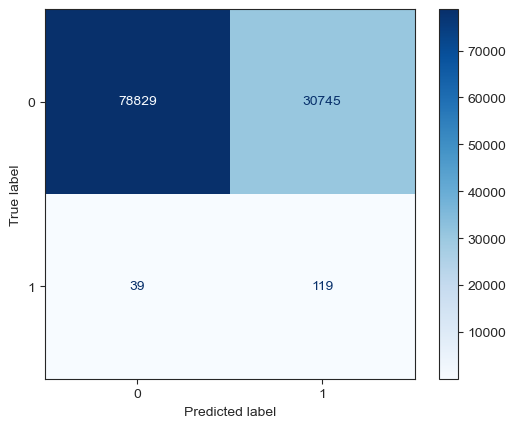

In [151]:
modelo_report_2(X_train, X_test, y_train, y_test, bl_rf)

### LightGBM

In [45]:
import lightgbm as lgb

In [46]:
model_lgb = lgb.LGBMClassifier()

Composición del training set:
0    1904
1     476
Name: deaths, dtype: int64


Accuracy= 0.9403273429810812
Recall= 0.3987341772151899
Precision= 0.009668508287292817
F-1 Score= 0.01887923284387174
Area bajo la curva ROC: 0.8036


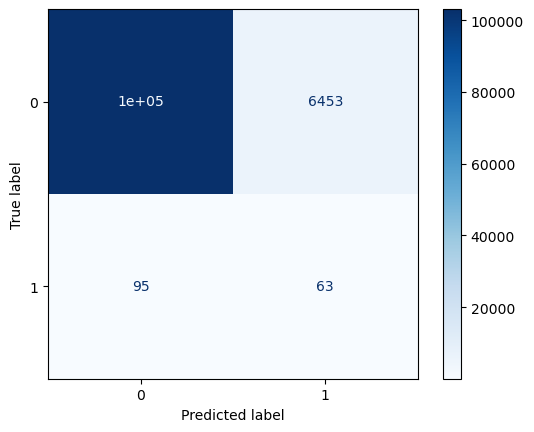

In [47]:
# 1 - Generamos dataset a utilizar con undersampling

undersampler_lgb=RandomUnderSampler(sampling_strategy=0.25)

X_train_lgb,y_train_lgb=undersampler_lgb.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_lgb.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_lgb, X_test, y_train_lgb, y_test, model_lgb)

Composición del training set:
1    476
0    476
Name: deaths, dtype: int64


Accuracy= 0.6983286552692013
Recall= 0.7215189873417721
Precision= 0.0034365297078949746
F-1 Score= 0.006840478833518346
Area bajo la curva ROC: 0.7794


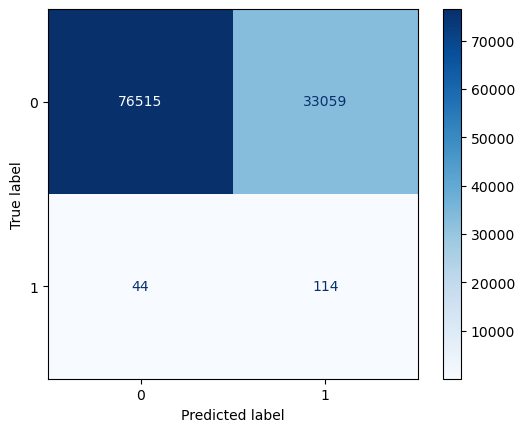

In [48]:
# 2 - Probamos con otra proporción de clases en el dataset

undersampler_lgb=RandomUnderSampler(sampling_strategy='majority')

X_train_lgb,y_train_lgb=undersampler_lgb.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_lgb.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_lgb, X_test, y_train_lgb, y_test, model_lgb)

Composición del training set:
0    1190
1     476
Name: deaths, dtype: int64


Accuracy= 0.8870794298837167
Recall= 0.5
Precision= 0.006375595190057299
F-1 Score= 0.012590644672882302
Area bajo la curva ROC: 0.7949


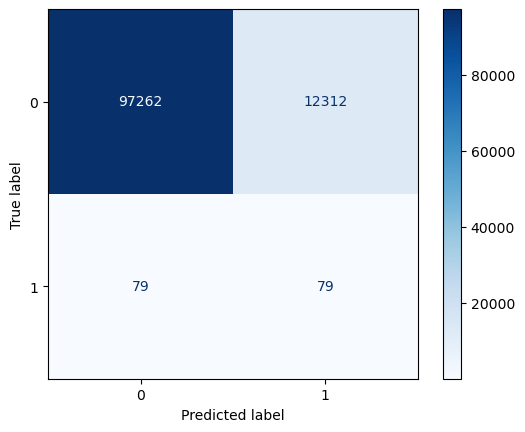

In [49]:
# 3 - Probamos con otra proporción de clases en el dataset

undersampler_lgb=RandomUnderSampler(sampling_strategy=0.4)

X_train_lgb,y_train_lgb=undersampler_lgb.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_lgb.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_lgb, X_test, y_train_lgb, y_test, model_lgb)

## Optimizando modelo de Random Forest

### Feature Importances

Composición del training set:
0    1190
1     476
Name: deaths, dtype: int64


Accuracy= 0.8997922210476433
Recall= 0.46835443037974683
Precision= 0.006735845621700346
F-1 Score= 0.013280689160086146
Area bajo la curva ROC: 0.7905


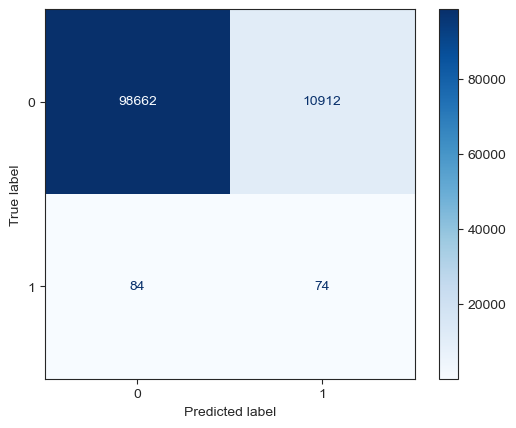

In [138]:
undersampler_rf=RandomUnderSampler(sampling_strategy=0.4)

X_train_rf,y_train_rf=undersampler_rf.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_rf.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, rf_clf)

In [75]:
# List of features
feature_list = list(X_train_rf.columns)

# Get numerical feature importances
importances = list(rf_clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: injured              Importance: 0.08
Variable: main_contributing_factor_Unsafe Speed Importance: 0.05
Variable: main_contributing_factor_Failure to Yield Right-of-Way Importance: 0.04
Variable: borough_BROOKLYN     Importance: 0.03
Variable: borough_QUEENS       Importance: 0.03
Variable: vehicle_Motorcycle   Importance: 0.03
Variable: vehicle_Passenger vehicle Importance: 0.03
Variable: vehicle_SUV          Importance: 0.03
Variable: main_contributing_factor_Traffic Control Disregarded Importance: 0.03
Variable: road_type_Avenue     Importance: 0.03
Variable: road_type_Street     Importance: 0.03
Variable: weekday_Friday       Importance: 0.03
Variable: weekday_Wednesday    Importance: 0.03
Variable: season_Fall          Importance: 0.03
Variable: season_Spring        Importance: 0.03
Variable: season_Summer        Importance: 0.03
Variable: season_Winter        Importance: 0.03
Variable: borough_BRONX        Importance: 0.02
Variable: borough_MANHATTAN    Importance: 0.02


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [120]:
sns.set_style('ticks')

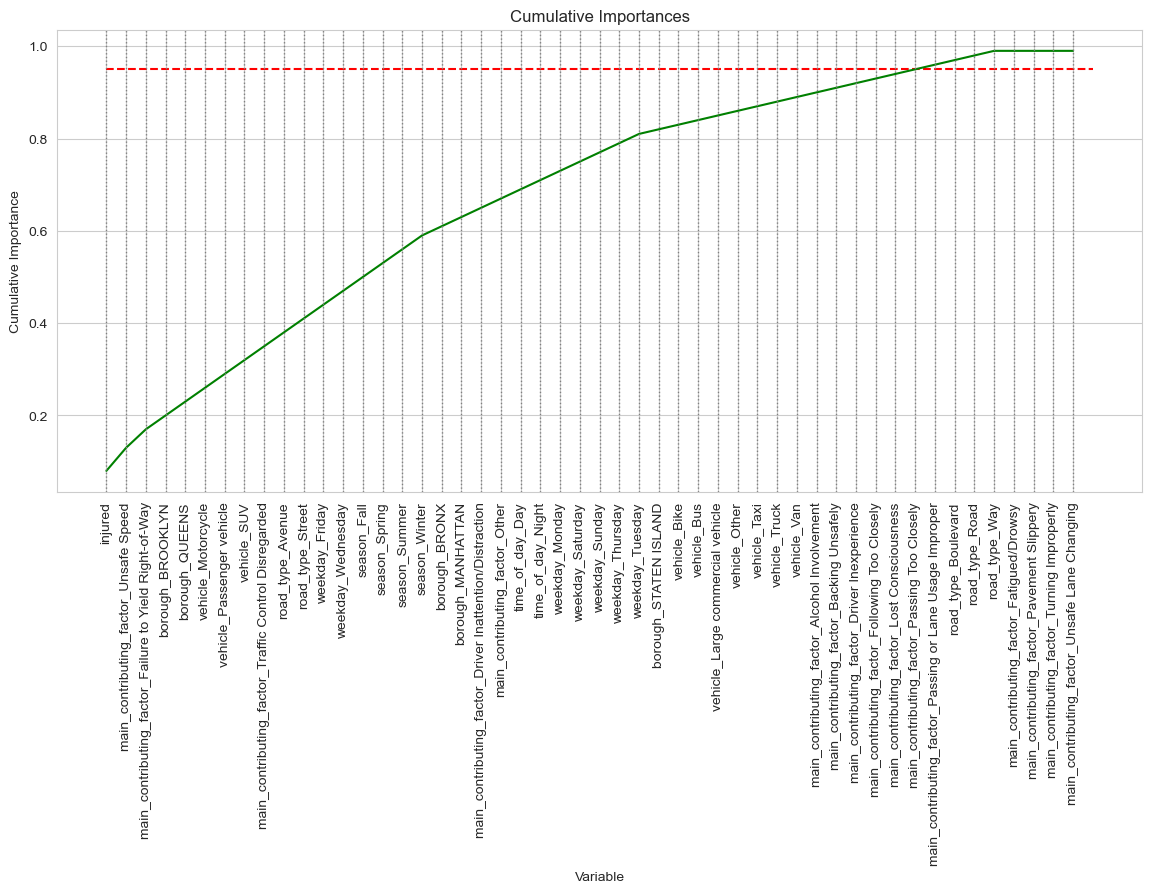

In [84]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.figure(figsize=(14, 6))
plt.plot(sorted_features, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')  # La línea roja discontinua representa el valor  y = 0.95
# Format x ticks and labels
plt.xticks(sorted_features, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

x_values = list(range(len(sorted_features)))
for x in x_values:
    plt.axvline(x=x, color='gray', linestyle='dotted', linewidth=1)

In [85]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 42


In [107]:
len(feature_list)

50

In [136]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:42]]

# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = X_train_rf.iloc[:, important_indices]
important_test_features = X_test.iloc[:, important_indices]

print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (1666, 42)
Important test features shape: (109732, 42)


Accuracy= 0.9162322749972661
Recall= 0.36075949367088606
Precision= 0.006230870135548754
F-1 Score= 0.0122501611863314
Area bajo la curva ROC: 0.7738


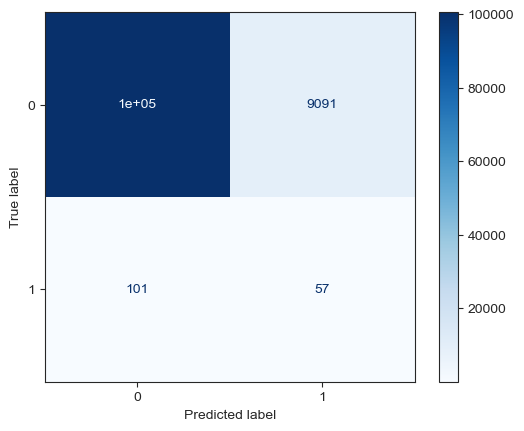

In [139]:
# Training and Evaluating on Important Features

modelo_report_2(important_train_features, important_test_features, y_train_rf, y_test, rf_clf)

In [ ]:
# Comparación

# Random Forest con undersampling (sample_strategy=0.4) con todas las features (50):

Accuracy= 0.8997922210476433
Recall= 0.46835443037974683
Precision= 0.006735845621700346
F-1 Score= 0.013280689160086146
Area bajo la curva ROC: 0.7905

# Random Forest con undersampling (sample_strategy=0.4) con las 42 features más importantes:

Accuracy= 0.9162322749972661
Recall= 0.36075949367088606
Precision= 0.006230870135548754
F-1 Score= 0.0122501611863314
Area bajo la curva ROC: 0.7738

### Hyperparameter tuning

In [17]:
model = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [18]:
# Random Hyperparameter Grid

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Class weight
class_weight = ['balanced', 'balanced_subsample']

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}
pprint(random_grid)

{'bootstrap': [True, False],
 'class_weight': ['balanced', 'balanced_subsample'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [159]:
# Random Search Training
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_rf, y_train_rf)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                  

In [160]:
# Best parameters

rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'class_weight': 'balanced',
 'bootstrap': True}

In [167]:
# Evaluate Random Search

base_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

best_random = rf_random.best_estimator_

Desempeño modelo base:
Accuracy= 0.8997922210476433
Recall= 0.46835443037974683
Precision= 0.006735845621700346
F-1 Score= 0.013280689160086146
Area bajo la curva ROC: 0.7905


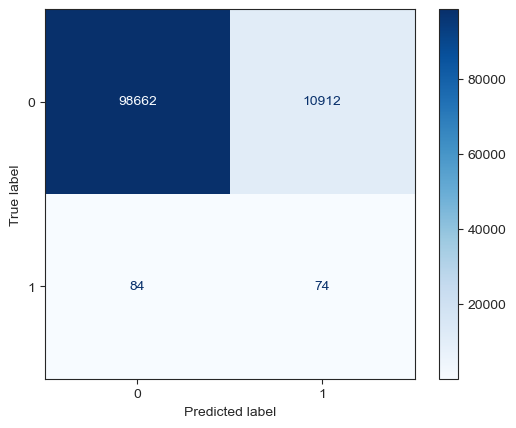

In [166]:
print("Desempeño modelo base:")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, base_model)

Desempeño mejor modelo random
Accuracy= 0.8710585790835854
Recall= 0.5632911392405063
Precision= 0.00628131837109182
F-1 Score= 0.012424094367278564
Area bajo la curva ROC: 0.809


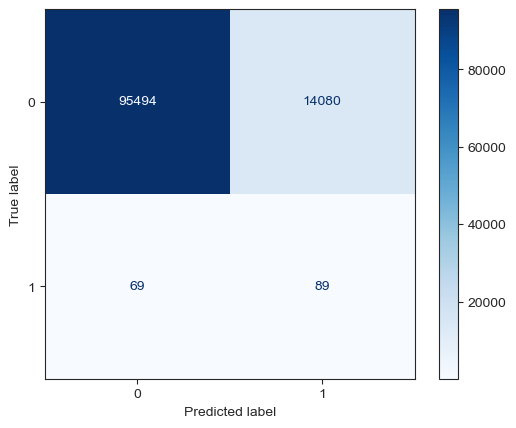

In [169]:
print("Desempeño mejor modelo random")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, best_random)

In [22]:
# Grid Search with Cross Validation

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [4, 5, 7, 9],
    'n_estimators': [700, 800, 900, 1000],
    'class_weight': ['balanced']
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [179]:
# Fit the grid search to the data
grid_search.fit(X_train_rf, y_train_rf)
grid_search.best_params_

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  2.9min finished


{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 1000}

In [182]:
# Evaluate Grid Search

base_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

best_grid = grid_search.best_estimator_

Desempeño modelo base:
Accuracy= 0.8997922210476433
Recall= 0.46835443037974683
Precision= 0.006735845621700346
F-1 Score= 0.013280689160086146
Area bajo la curva ROC: 0.7905


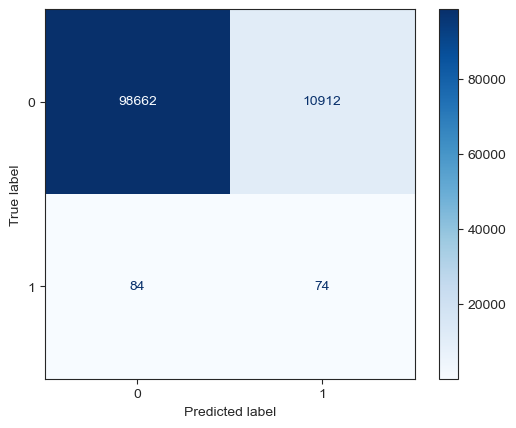

In [181]:
print("Desempeño modelo base:")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, base_model)

Desempeño mejor modelo grid search
Accuracy= 0.8577534356432034
Recall= 0.5949367088607594
Precision= 0.006010614489417482
F-1 Score= 0.011900993859593593
Area bajo la curva ROC: 0.8104


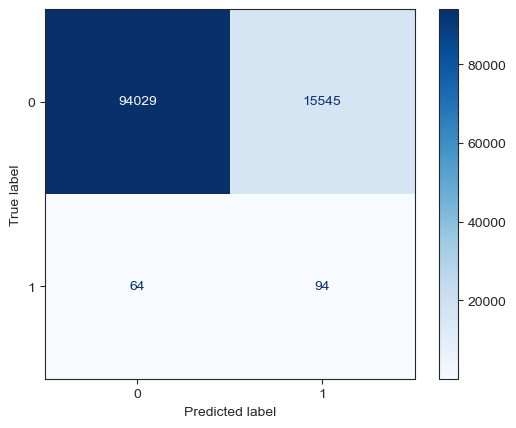

In [183]:
print("Desempeño mejor modelo grid search")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, best_grid)

## Optimizando Balanced Random Forest

In [16]:
bl_rf = BalancedRandomForestClassifier(random_state=42)
pprint(bl_rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'replacement': False,
 'sampling_strategy': 'auto',
 'verbose': 0,
 'warm_start': False}


In [18]:
# Random Search

# Random Hyperparameter Grid

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Class weight
class_weight = ['balanced', 'balanced_subsample']

# Sampling strategy
sampling_strategy = ['majority', 0.25, 0.4]

# Replacement
replacement = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight,
               'sampling_strategy': sampling_strategy,
               'replacement': replacement}
pprint(random_grid)

{'bootstrap': [True, False],
 'class_weight': ['balanced', 'balanced_subsample'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'replacement': [True, False],
 'sampling_strategy': ['majority', 0.25, 0.4]}


In [19]:
# Random Search Training
bal_rf = BalancedRandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
bal_rf_random = RandomizedSearchCV(estimator = bal_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
bal_rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 74.8min finished


RandomizedSearchCV(cv=3, estimator=BalancedRandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
           

In [24]:
bal_rf_random.best_params_

{'sampling_strategy': 0.25,
 'replacement': True,
 'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'class_weight': 'balanced',
 'bootstrap': False}

Accuracy= 0.9497047351729668
Recall= 0.31645569620253167
Precision= 0.009155832265152902
F-1 Score= 0.01779676098949991
Area bajo la curva ROC: 0.7894


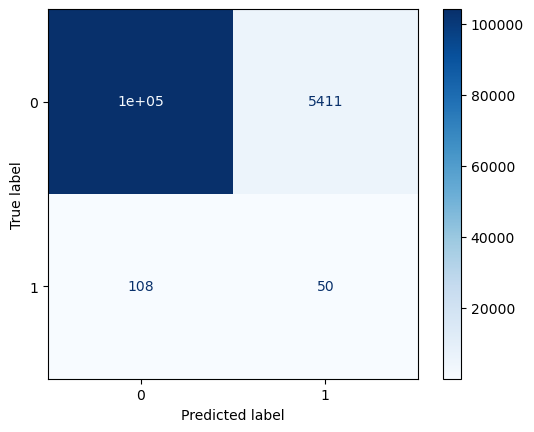

In [23]:
best_random_bal = bal_rf_random.best_estimator_
modelo_report_2(X_train, X_test, y_train, y_test, best_random_bal)

## Resumen de Métricas

In [25]:
metrics = pd.read_csv('../TP_Integrador/metrics_modelo_carlos.csv')

In [27]:
metrics.sort_values(by='Recall', ascending=False)

,Dataset,Modelo,Recall,Precision,AUC
12,Undersampling (strategy=’majority’),Random Forest,0.753160,0.003570,0.7906
14,Original,Balanced Random Forest,0.753160,0.003850,0.8103
16,Undersampling (strategy=’majority’),LightGBM,0.721500,0.003430,0.7794
9,Undersampling (strategy=’majority’),Bagging (DT),0.708860,0.003420,0.7880
2,Undersampling (strategy=’majority’),Decision tree (base),0.601260,0.002340,0.6205
20,Undersampling (strategy=0.4),RF Grid Search,0.594930,0.006010,0.8104
19,Undersampling (strategy=0.4),RF Random Search,0.563290,0.006281,0.8090
3,Undersampling (strategy=0.4),Decision tree (base),0.531640,0.003720,0.6677
17,Undersampling (strategy=0.4),LightGBM,0.500000,0.006375,0.7949
10,Undersampling (strategy=0.4),Bagging (DT),0.500000,0.005124,0.7799
